In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
applicationData = pd.read_csv('application_data.csv')

In [3]:
previousApplication = pd.read_csv('previous_application.csv')

In [4]:
applicationData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(applicationData.size)

37516342


In [6]:
print(applicationData.shape)

(307511, 122)


## Analysis of application data table

In [7]:
applicationData['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [8]:
applicationData['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

#### this can be converted to percentage or other units
- heat map may be of some help here

In [9]:
applicationData['REGION_POPULATION_RELATIVE'].unique()

array([0.018801, 0.003541, 0.010032, 0.008019, 0.028663, 0.035792,
       0.003122, 0.018634, 0.019689, 0.0228  , 0.015221, 0.031329,
       0.016612, 0.010006, 0.020713, 0.010966, 0.04622 , 0.025164,
       0.006296, 0.026392, 0.018029, 0.019101, 0.030755, 0.008575,
       0.01885 , 0.006207, 0.009175, 0.007305, 0.007114, 0.009334,
       0.022625, 0.01452 , 0.006629, 0.00733 , 0.032561, 0.00496 ,
       0.072508, 0.009657, 0.02461 , 0.003069, 0.020246, 0.018209,
       0.009549, 0.007274, 0.002134, 0.010276, 0.003813, 0.003818,
       0.00712 , 0.0105  , 0.010147, 0.010643, 0.008866, 0.00702 ,
       0.002506, 0.005313, 0.006233, 0.008474, 0.005144, 0.011657,
       0.008625, 0.014464, 0.004849, 0.006008, 0.00963 , 0.005002,
       0.006852, 0.011703, 0.006305, 0.010556, 0.00823 , 0.006671,
       0.002042, 0.005084, 0.008068, 0.001333, 0.001417, 0.001276,
       0.000938, 0.000533, 0.00029 ])

#### we have to look for corelation between income type and occupation type and it's relation to our target variable

In [10]:
applicationData['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [11]:
applicationData['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

### organization type may be clubbed with occupation type and income type for multivariate analysis

In [12]:
applicationData['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

### How old is the building in which client is living. 
- there may be 2 interpretations here. 
- Older building might imply clients inability to move to newer locality. or Older building may be good enough to move
- Newer builing might imply that client may have another loan to pay or might have invested recently. He may not be able to make more room for investments
- Or Older the building, more authentic client might be as we can have multiple witnesses.\
### We will also have to adjust the scale here

In [13]:
applicationData['YEARS_BUILD_AVG'].unique()

array([6.192e-01, 7.960e-01,       nan, 7.348e-01, 9.796e-01, 8.368e-01,
       7.008e-01, 7.076e-01, 8.300e-01, 8.096e-01, 7.688e-01, 6.736e-01,
       9.456e-01, 7.416e-01, 7.892e-01, 7.280e-01, 8.436e-01, 1.160e-01,
       7.824e-01, 8.028e-01, 5.580e-01, 8.504e-01, 6.600e-01, 7.620e-01,
       6.260e-01, 9.660e-01, 9.864e-01, 6.328e-01, 9.728e-01, 8.164e-01,
       6.668e-01, 7.144e-01, 7.552e-01, 5.648e-01, 9.252e-01, 6.872e-01,
       6.532e-01, 6.940e-01, 6.464e-01, 8.572e-01, 5.784e-01, 7.484e-01,
       9.932e-01, 8.232e-01, 8.708e-01, 5.920e-01, 8.844e-01, 6.056e-01,
       9.048e-01, 5.376e-01, 8.640e-01, 6.396e-01, 8.776e-01, 9.320e-01,
       7.756e-01, 4.628e-01, 3.200e-01, 4.492e-01, 4.288e-01, 2.760e-02,
       9.116e-01, 4.764e-01, 6.804e-01, 7.212e-01, 8.980e-01, 3.268e-01,
       6.124e-01, 9.184e-01, 5.716e-01, 5.444e-01, 9.388e-01, 9.592e-01,
       8.912e-01, 4.356e-01, 3.336e-01, 1.000e+00, 3.880e-01, 5.512e-01,
       5.852e-01, 9.524e-01, 3.404e-01, 4.832e-01, 

In [14]:
applicationData['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [15]:
# code for inspection
print(applicationData.size)
print(applicationData.shape)

37516342
(307511, 122)


In [16]:
applicationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [17]:
applicationData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [22]:
def getColumnWiseNulls():
    colWiseNulls = round(100*(applicationData.isnull().sum()/len(applicationData.index)), 2)
    colWiseNulls= colWiseNulls.iloc[colWiseNulls.nonzero()].sort_values(ascending=False)
    return colWiseNulls

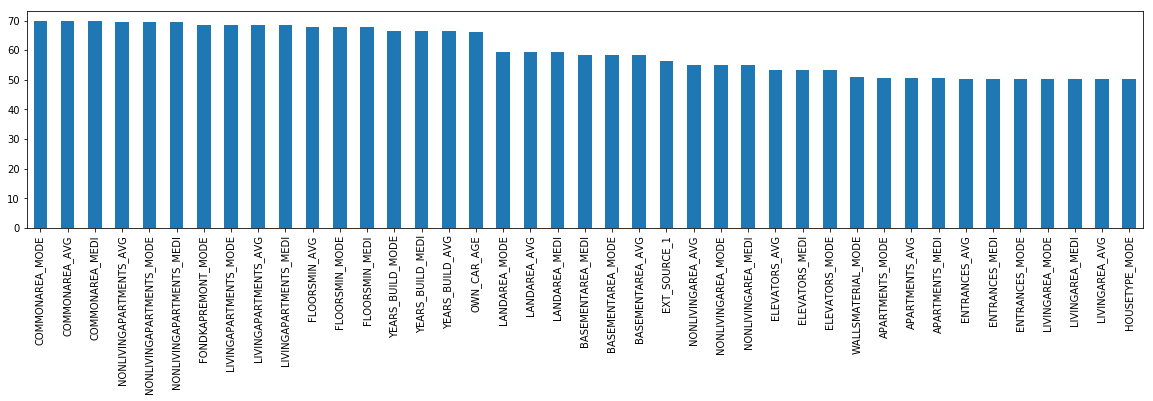

In [23]:
res = getColumnWiseNulls()
plt.figure(figsize=(20,4))
res[res>50].plot.bar()

### We can eliminate columns with more that 50% null values

In [24]:
def RemoveNullColumns(dataFrame, percent= 0.5):
    df = dataFrame.copy()
    ishape = df.shape
    colWiseNulls = df.isnull().sum()/len(df.index)
    colNames = list(colWiseNulls[colWiseNulls.values>=percent].index)
    df.drop(labels=colNames, inplace=True , axis=1)
    
    return df

In [43]:
applicationData = RemoveNullColumns(applicationData, 0.3)

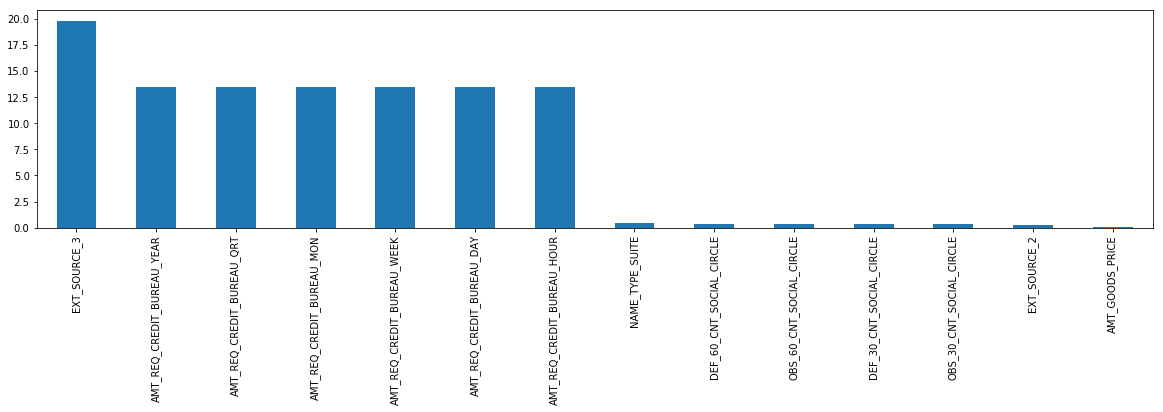

In [44]:
res = getColumnWiseNulls()
plt.figure(figsize=(20,4))
# res[res>30].plot.bar()
res.plot.bar()

In [39]:
applicationData['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

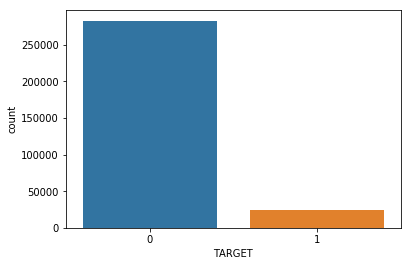

In [35]:
sns.countplot(x='TARGET', data=applicationData)

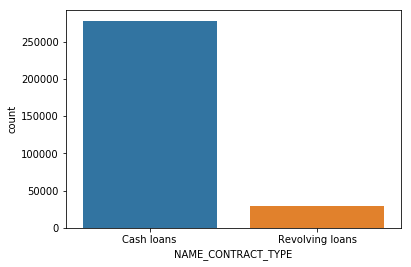

In [47]:
sns.countplot(x='NAME_CONTRACT_TYPE', data=applicationData)

In [38]:
applicationData['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

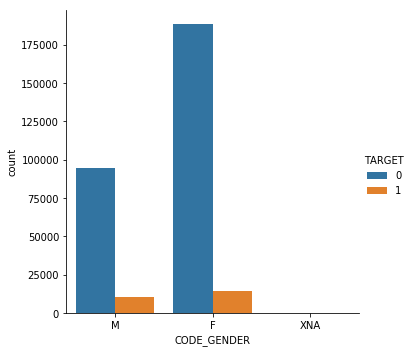

In [51]:
sns.catplot(x='CODE_GENDER', hue='TARGET', data=applicationData, kind='count')